In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
usd_bitcoin_1min = pd.read_csv("~/Documents/Spring 2018/AM 231/Final Project/bitcoin_1min/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv")

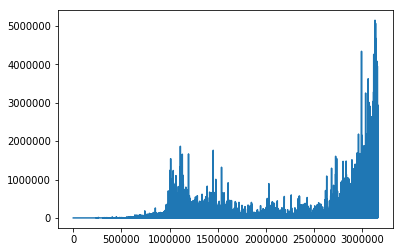

In [3]:
plt.plot(range(usd_bitcoin_1min.shape[0]), usd_bitcoin_1min['Volume_(Currency)'])

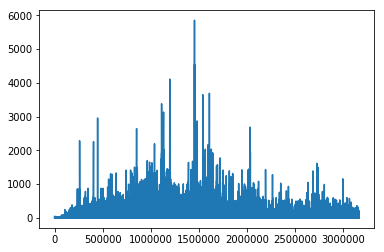

In [4]:
plt.plot(range(usd_bitcoin_1min.shape[0]), usd_bitcoin_1min['Volume_(BTC)'])

In [5]:
bitcoin = pd.read_csv("~/Documents/Spring 2018/AM 231/Final Project/cryptocurrencypricehistory-daily/bitcoin_dataset.csv")

In [6]:
bitcoin.iloc[170:180, :]

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
170,2010-08-12 00:00:00,0.000000,3694250.0,0.00000,144.3617,1.0,0.000459,0.0,2.0,0.0,...,48.045221,0.000000,462.0,407.0,102783.0,407.0,407.0,37502.57,22687.0,0.0
171,2010-08-13 00:00:00,0.000000,3705100.0,0.00000,251.4239,1.0,0.000795,0.0,2.0,0.0,...,49.447217,0.000000,600.0,508.0,103291.0,508.0,317.0,45207.98,21943.0,0.0
172,2010-08-14 00:00:00,0.000000,3718150.0,0.00000,308.2940,1.0,0.000436,0.0,2.0,0.0,...,112.630496,0.000000,450.0,424.0,103715.0,424.0,424.0,32041.73,11587.0,0.0
173,2010-08-15 00:00:00,0.000000,3731900.0,0.00000,312.4009,1.0,0.000512,0.0,2.0,0.0,...,102.848800,0.000000,402.0,423.0,104138.0,423.0,423.0,32624.12,13369.0,0.0
174,2010-08-16 00:00:00,0.000000,3737700.0,0.00000,643.8882,1.0,0.000755,0.0,1.0,0.0,...,31.632366,0.000000,387.0,318.0,104456.0,318.0,318.0,41918.88,18336.0,0.0
175,2010-08-17 00:00:00,0.076900,3744250.0,287932.82500,923.0018,1.0,0.000959,0.0,1.0,0.0,...,13.567889,1.430952,393.0,352.0,104808.0,352.0,352.0,72855.15,48276.0,3712.0
176,2010-08-18 00:00:00,0.074000,3750900.0,277566.60000,206.7786,1.0,0.001973,0.0,1.0,0.0,...,18.583081,1.305501,449.0,377.0,105185.0,377.0,377.0,52829.65,35791.0,2649.0
177,2010-08-19 00:00:00,0.068800,3757900.0,258543.52000,51.8784,1.0,0.000715,0.0,1.0,0.0,...,50.886220,1.308696,395.0,368.0,105553.0,368.0,368.0,32027.42,13756.0,946.0
178,2010-08-20 00:00:00,0.066700,3766250.0,251208.87500,293.9825,1.0,0.000649,0.0,1.0,0.0,...,39.493369,1.399359,433.0,398.0,105951.0,398.0,398.0,36647.52,21143.0,1410.0
179,2010-08-21 00:00:00,0.066899,3775450.0,252573.82955,731.0702,1.0,0.000528,0.0,1.0,0.0,...,52.705028,1.768594,396.0,348.0,106299.0,348.0,348.0,33790.41,17456.0,1168.0


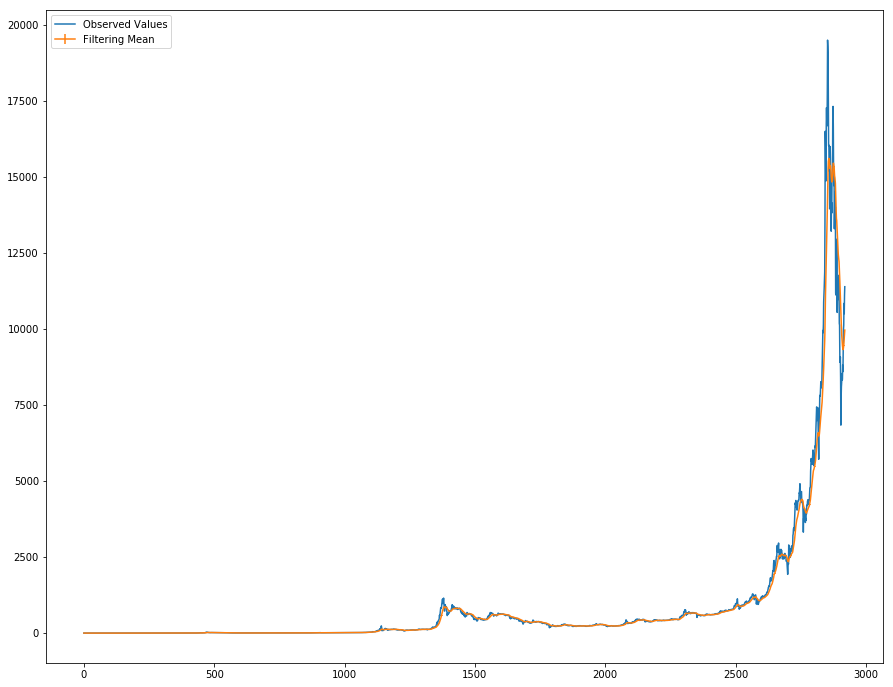

In [7]:
# read data and set initial values

mu_eps = 0
sig_eps = 0.1
mu_gam = 0
sig_gam = 1.0
mus = [0.05]
sigmas = [1]

x = bitcoin.btc_market_price.values

for i, val in enumerate(x[1:]):
    v = sigmas[-1]**2 + sig_eps**2
    mu = mus[-1] + v/(sig_gam**2+v)*(val-mus[-1])
    mus.append(mu)
    sigma = (sig_gam**2)*v/(v+sig_gam**2)
    sigmas.append(np.sqrt(sigma))


# plot filter mean and error bar
fig, ax = plt.subplots(figsize=(15, 12))
ax.plot(range(len(x)), x, label='Observed Values')
ax.errorbar(range(len(mus)), mus, np.array(sigmas)*2, label='Filtering Mean')
ax.legend(loc='best')
